## Import liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

## Read Data

In [2]:
data = pd.read_csv(r"C:\Users\20106\Downloads\Mall_Customers.csv", index_col = "CustomerID")

In [3]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Overview on data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
data.duplicated().sum()

0

- data 5 columns and 200 sample
- No null values in dataset
- No duplicated 

## Analysis categorical Features

In [6]:
data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

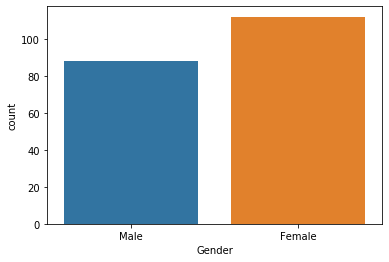

In [7]:
sns.countplot(data = data, x= "Gender")

- Females are more than males

## Analysis numerical features

In [8]:
data.select_dtypes("number").describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


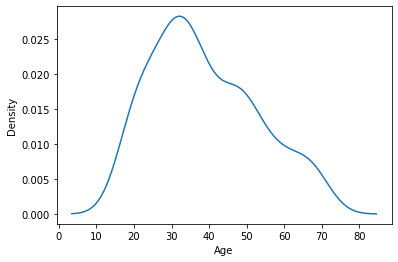

In [9]:
sns.kdeplot(data= data , x= "Age")

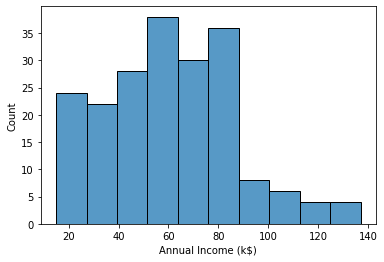

In [10]:
sns.histplot(data= data, x= "Annual Income (k$)", bins=10)

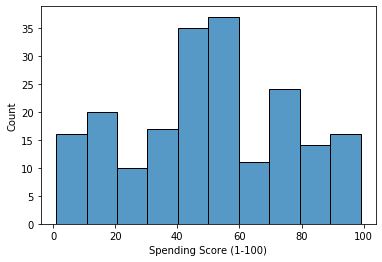

In [11]:
sns.histplot(data= data, x= "Spending Score (1-100)", bins=10)

## Multivariate Analysis

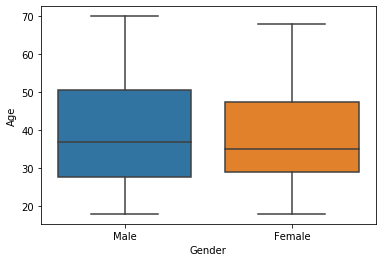

In [12]:
sns.boxplot(data= data, x= "Gender", y= "Age")

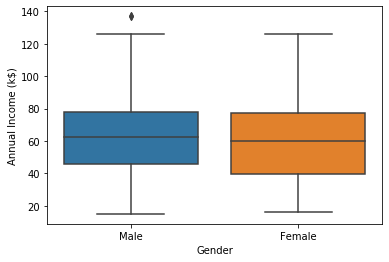

In [13]:
sns.boxplot(data= data, x= "Gender", y= "Annual Income (k$)")

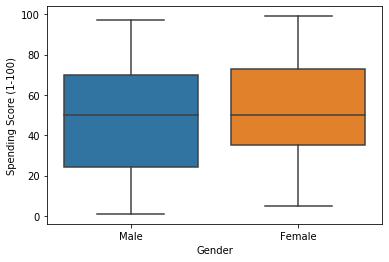

In [14]:
sns.boxplot(data= data, x= "Gender", y= "Spending Score (1-100)")

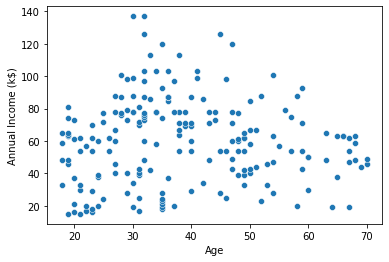

In [15]:
sns.scatterplot(data= data, x= "Age", y= "Annual Income (k$)")

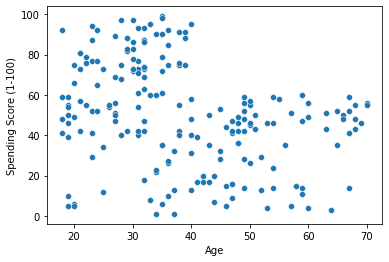

In [16]:
sns.scatterplot(data= data, x= "Age", y= "Spending Score (1-100)")

- The graph shows that spending score decrease by increasing the age

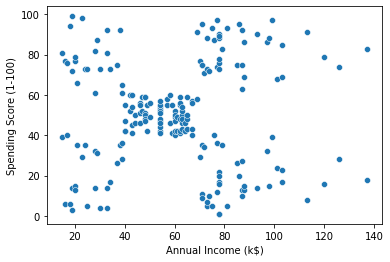

In [17]:
sns.scatterplot(data= data, x= "Annual Income (k$)", y= "Spending Score (1-100)")

- This graph is useful to define number of clusters in 2D 

## Encoding categorical variables

In [18]:
encoder = LabelEncoder()
data["Gender"] = encoder.fit_transform(data["Gender"])

In [19]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


- 1 is male and 0 is female

## Clustering

In [20]:
k_values= range(1,11)
wcss= []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\20106\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


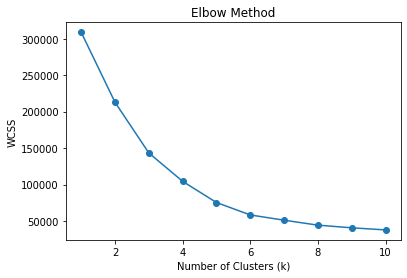

In [21]:
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

- I think 5 clusters is good from elbow method and previous graph in 2D but 6 can be more better if we plot data in 3D by using plotly.
- Notice that our sample is so small so 5 clusters are enough.

In [22]:
kmean = KMeans(n_clusters= 5)
kmean.fit(data)

KMeans(n_clusters=5)

In [23]:
data["label"] = kmean.labels_

In [24]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,1
3,0,20,16,6,3
4,0,23,16,77,1
5,0,31,17,40,3


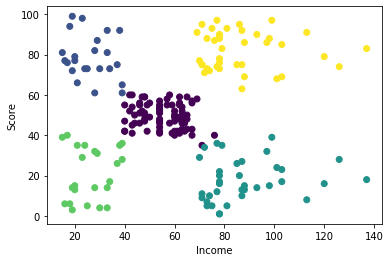

In [25]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c= data["label"])
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

Analysis for label: 0
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  label
count  79.000000  79.000000           79.000000               79.000000   79.0
mean    0.417722  43.088608           55.291139               49.569620    0.0
std     0.496335  16.478572            8.710665                6.242295    0.0
min     0.000000  18.000000           40.000000               35.000000    0.0
25%     0.000000  27.000000           48.000000               44.500000    0.0
50%     0.000000  47.000000           54.000000               50.000000    0.0
75%     1.000000  54.500000           62.000000               55.000000    0.0
max     1.000000  70.000000           76.000000               60.000000    0.0
visualize Gender for label0


C:\Users\20106\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


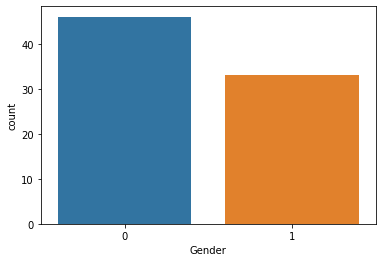

********************************************************************************
Analysis for label: 1
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  label
count  23.000000  23.000000           23.000000               23.000000   23.0
mean    0.391304  25.521739           26.304348               78.565217    1.0
std     0.499011   5.273170            7.893811               10.953729    0.0
min     0.000000  18.000000           15.000000               61.000000    1.0
25%     0.000000  21.500000           19.500000               73.000000    1.0
50%     0.000000  24.000000           25.000000               77.000000    1.0
75%     1.000000  30.000000           33.000000               84.500000    1.0
max     1.000000  35.000000           39.000000               99.000000    1.0
visualize Gender for label1


C:\Users\20106\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


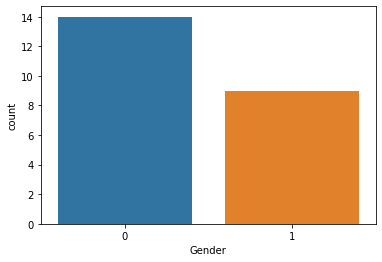

********************************************************************************
Analysis for label: 2
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  label
count  36.000000  36.000000           36.000000               36.000000   36.0
mean    0.527778  40.666667           87.750000               17.583333    2.0
std     0.506309  11.496583           16.387059               10.204691    0.0
min     0.000000  19.000000           70.000000                1.000000    2.0
25%     0.000000  34.000000           77.000000               10.000000    2.0
50%     1.000000  41.500000           83.000000               16.000000    2.0
75%     1.000000  47.250000           97.250000               24.500000    2.0
max     1.000000  59.000000          137.000000               39.000000    2.0
visualize Gender for label2


C:\Users\20106\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


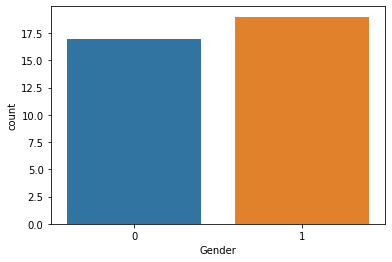

********************************************************************************
Analysis for label: 3
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  label
count  23.000000  23.000000           23.000000               23.000000   23.0
mean    0.391304  45.217391           26.304348               20.913043    3.0
std     0.499011  13.228607            7.893811               13.017167    0.0
min     0.000000  19.000000           15.000000                3.000000    3.0
25%     0.000000  35.500000           19.500000                9.500000    3.0
50%     0.000000  46.000000           25.000000               17.000000    3.0
75%     1.000000  53.500000           33.000000               33.500000    3.0
max     1.000000  67.000000           39.000000               40.000000    3.0
visualize Gender for label3


C:\Users\20106\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


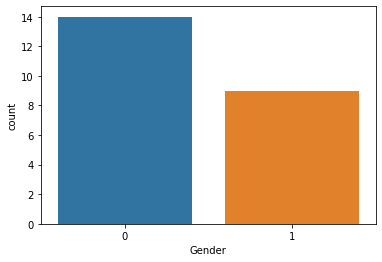

********************************************************************************
Analysis for label: 4
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  label
count  39.000000  39.000000           39.000000               39.000000   39.0
mean    0.461538  32.692308           86.538462               82.128205    4.0
std     0.505035   3.728650           16.312485                9.364489    0.0
min     0.000000  27.000000           69.000000               63.000000    4.0
25%     0.000000  30.000000           75.500000               74.500000    4.0
50%     0.000000  32.000000           79.000000               83.000000    4.0
75%     1.000000  35.500000           95.000000               90.000000    4.0
max     1.000000  40.000000          137.000000               97.000000    4.0
visualize Gender for label4


C:\Users\20106\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


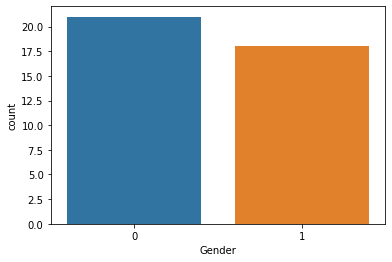

********************************************************************************


In [26]:
max_Income = []
min_Income = []
max_Score = []
min_Score = []
max_Age = []
min_Age = []
for l in range(5):
    df_L = data[ data["label"] == l]
    print(f"Analysis for label: {l}")
    print(df_L.describe())
    max_Income.append(df_L["Annual Income (k$)"].max()) 
    min_Income.append(df_L["Annual Income (k$)"].min()) 
    max_Score.append(df_L["Spending Score (1-100)"].max()) 
    min_Score.append(df_L["Spending Score (1-100)"].min()) 
    max_Age.append(df_L["Age"].max()) 
    min_Age.append(df_L["Age"].min())
    print("visualize Gender for label" + str(l))
    sns.countplot(df_L.Gender)
    plt.show()
    print('*'*80)
    

- Label 0 has largest number of customers 79 customer.
- Female is more than male in all labels except label 2.

In [27]:
stat_dict = {"max_Income":max_Income,
            "min_Income":min_Income,
            "max_Score":max_Score,
            "min_Score":min_Score,
            "max_Age":max_Age,
            "min_Age":min_Age}

In [28]:
stat_df = pd.DataFrame(stat_dict)

In [29]:
stat_df

,max_Income,min_Income,max_Score,min_Score,max_Age,min_Age
0,76,40,60,35,70,18
1,39,15,99,61,35,18
2,137,70,39,1,59,19
3,39,15,40,3,67,19
4,137,69,97,63,40,27


plot of max_Income for each label


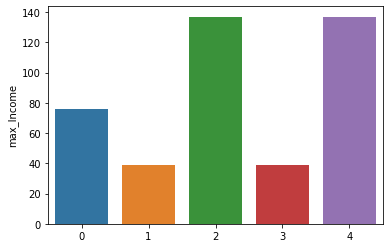

********************************************************************************
plot of min_Income for each label


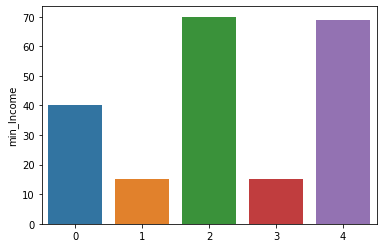

********************************************************************************
plot of max_Score for each label


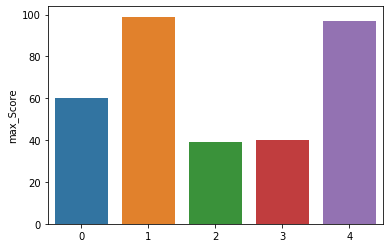

********************************************************************************
plot of min_Score for each label


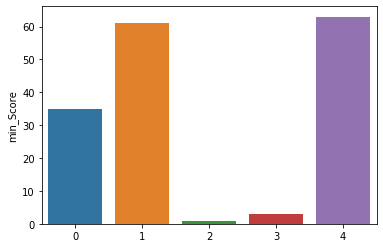

********************************************************************************
plot of max_Age for each label


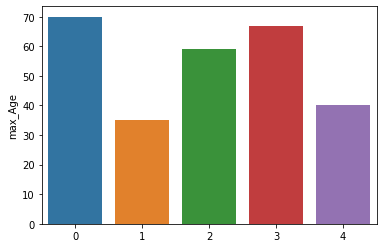

********************************************************************************
plot of min_Age for each label


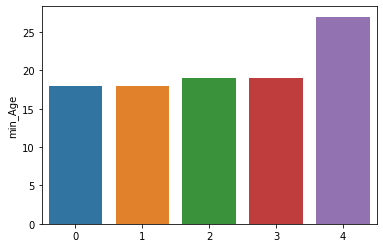

********************************************************************************


In [32]:
for c in stat_df.columns:
    print(f"plot of {c} for each label")
    sns.barplot( x= stat_df.index,y= stat_df[c])
    plt.show()
    print("*"*80)

- Highest income for customers in label 2 and 4
- Lowest income for customers in label 1 and 3
- Highest score in label 1 and 4
- Lowest score in label 2 and 3
- Oldest person in label 0
- Smallest customers in label 0 and 1

## Why Score in label 2 is lower than label 1 alhough income of label 2 higher than label 1 ?

- Because the age as we proved that the score decrease by increasing the age from the scatter plot which represent the relation between score and age.

## Label 2

- mean of Age: 40.666667
- mean of Score: 17.583333

## Label 1

- mean of Age: 25.521739
- mean of Score: 78.565217